<a href="https://colab.research.google.com/github/shivani250496/Cat-vs-Dog-project/blob/main/cat_vs_dog_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
import os
import pandas as pd

filenames = os.listdir("/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,cat.84.jpg,0
1,cat.99.jpg,0
2,cat.8.jpg,0
3,cat.75.jpg,0
4,cat.93.jpg,0


In [ ]:
df.tail()

,filename,category
397,dog.139.jpg,1
398,dog.107.jpg,1
399,dog.156.jpg,1
400,dog.104.jpg,1
401,dog.100.jpg,1


<Axes: xlabel='category'>

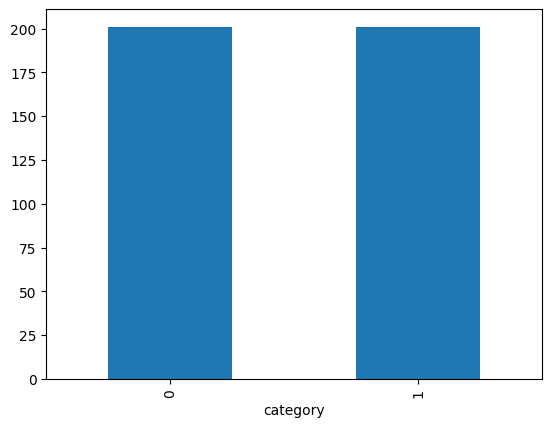

In [ ]:
df['category'].value_counts().plot.bar()

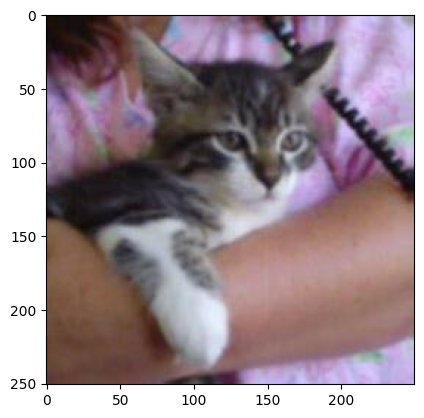

In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# List all files in the specified directory
filenames = os.listdir("/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/train")

# Choose a random filename from the list
sample = random.choice(filenames)

# Load the image using load_img from tensorflow.keras.preprocessing.image
image = load_img("/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/train/" + sample)

# Display the image
plt.imshow(image)
plt.axis('on')  # Turn off axis labels
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 61, 61, 64)       

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have features and labels stored in arrays X and y respectively
# Let's define sample arrays for demonstration purposes
X = np.random.rand(100, 10)  # Sample feature matrix with 100 samples and 10 features
y = np.random.randint(0, 2, size=(100,))  # Sample labels (binary classification)

# Define your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile your model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define callbacks
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Train your model using callbacks
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[earlystop, learning_rate_reduction])



Epoch 1/100
3/3 [==============================] - 2s 166ms/step - loss: 0.7035 - accuracy: 0.5125 - val_loss: 0.7096 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6972 - accuracy: 0.5000 - val_loss: 0.7116 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6939 - accuracy: 0.5375 - val_loss: 0.7079 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6816 - accuracy: 0.5625
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
3/3 [==============================] - 0s 42ms/step - loss: 0.6907 - accuracy: 0.5375 - val_loss: 0.7093 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.7095 - val_accuracy: 0.4000 - lr: 5.0000e-04
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6842

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

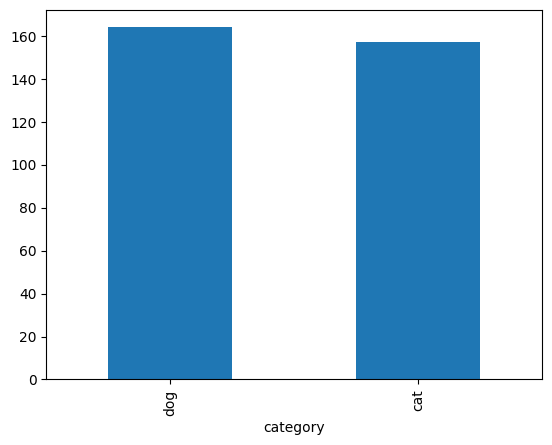

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

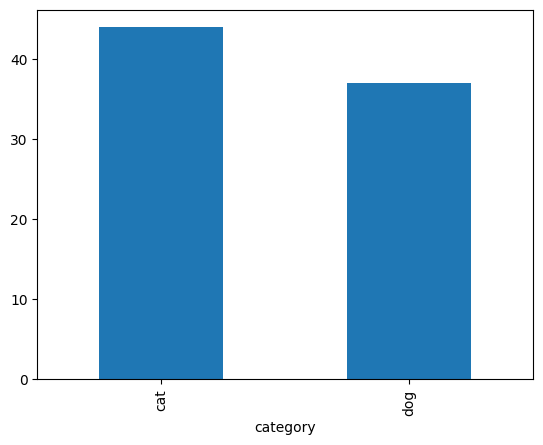

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # Specify the dataframe containing filenames and categories
    directory="/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/train",  # Specify the directory containing the images
    x_col='filename',  # Specify the column containing the filenames
    y_col='category',  # Specify the column containing the categories
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 321 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,"/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 81 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
   "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/train" ,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


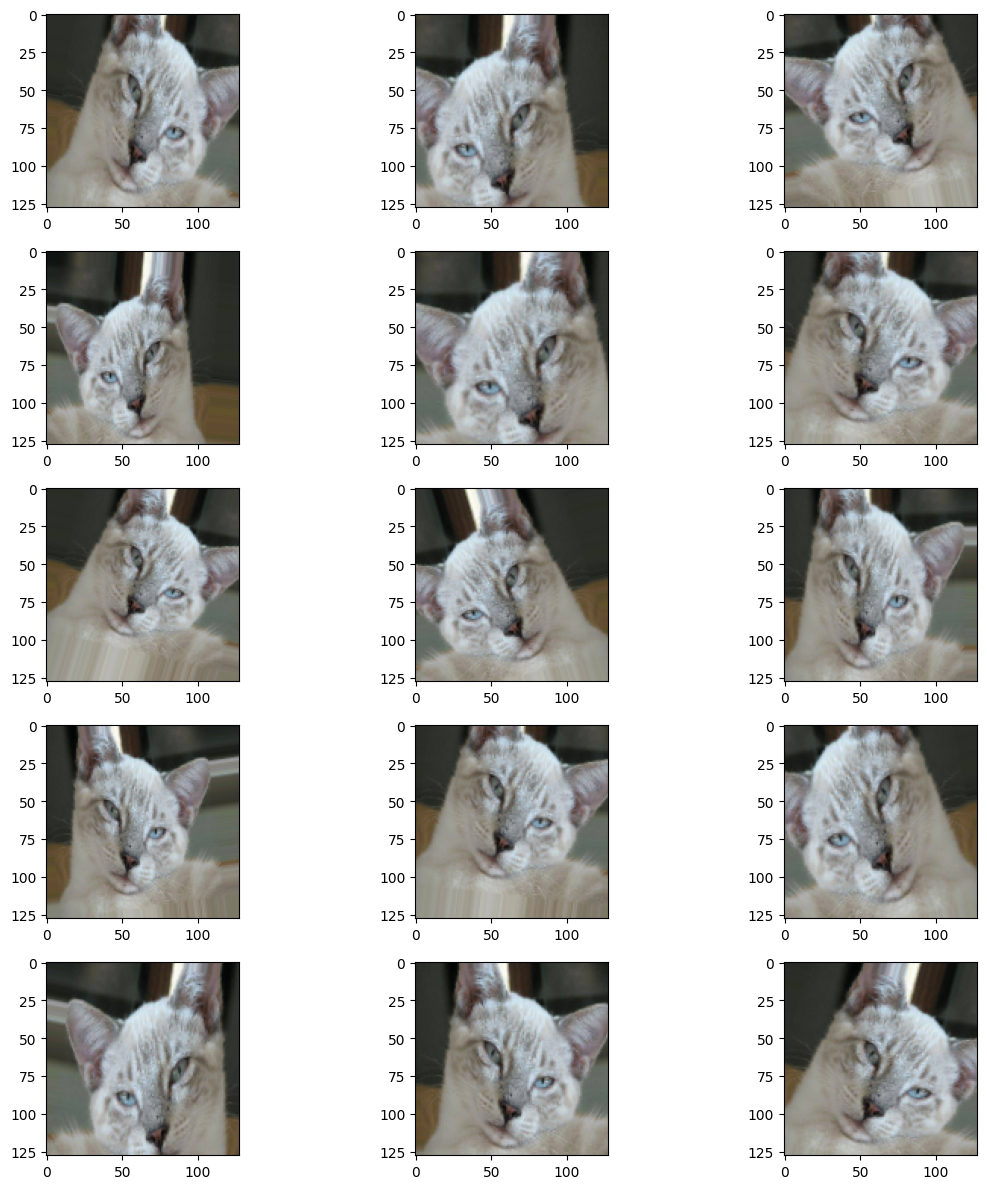

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define epochs
epochs = 3 if FAST_RUN else 50

# Define callbacks
checkpoint = ModelCheckpoint("model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

callbacks = [checkpoint, early_stopping]

# Training the model with error handling
try:
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=total_validate//batch_size,
        steps_per_epoch=total_train//batch_size,
        callbacks=callbacks
    )
except Exception as e:
    print("An error occurred during training:", str(e))



Epoch 1/50
An error occurred during training: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_ob

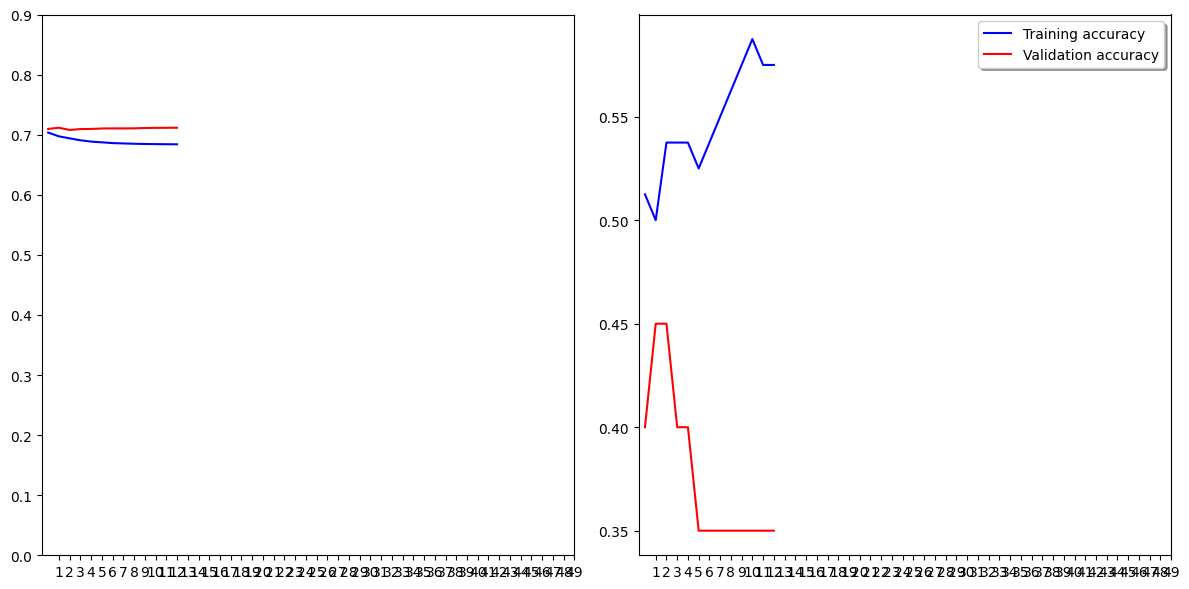

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

for i in range(8):
    all_test_images = os.listdir("/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test")
    random_image = random.choice(all_test_images)
    img_path = f'"/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"{random_image}'
    if os.path.isfile(img_path):  # Check if the file exists
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image is loaded successfully
            img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
            org = img.copy()
            img = img.reshape(1, 128, 128, 3)
            pred = model.predict(img)  # Fixed variable name to 'pred'
            print(['cat', 'dog'][int(pred[0][0])])
            plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
            plt.show()
        else:
            print(f"Failed to load image: {img_path}")
    else:
        print(f"Image file not found: {img_path}")



Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"158.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"191.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"247.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"203.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"55.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"107.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"97.jpg
Image file not found: "/content/drive/MyDrive/Deep Learning Projects/2 Image Classification/test"131.jpg


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))  # Resize the image to match the expected input shape

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')